<a href="https://colab.research.google.com/github/nadirboulahchiche/Heart-dataset-tutorial-using-randomforest/blob/main/Heart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 . Downloading the Data :**

In [ ]:
!wget -O heart.csv https://drive.google.com/u/0/uc?id=1fCDJGDcRaL66dOu1gSEIcQ60VXFVxlDx&export=download

--2021-12-21 20:28:22--  https://drive.google.com/u/0/uc?id=1fCDJGDcRaL66dOu1gSEIcQ60VXFVxlDx
Resolving drive.google.com (drive.google.com)... 172.253.123.113, 172.253.123.102, 172.253.123.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.123.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6u5n6q30o11bh0s1gl412sp7kisk4uu/1640118450000/05982712181181285061/*/1fCDJGDcRaL66dOu1gSEIcQ60VXFVxlDx [following]
--2021-12-21 20:28:22--  https://doc-0g-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6u5n6q30o11bh0s1gl412sp7kisk4uu/1640118450000/05982712181181285061/*/1fCDJGDcRaL66dOu1gSEIcQ60VXFVxlDx
Resolving doc-0g-78-docs.googleusercontent.com (doc-0g-78-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-0g-78-docs.googleusercontent.com (doc-0g-78-docs.googleusercontent.co

# **2 . Importing all libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# **3 . Reading the data and exploring :**

In [ ]:
path = "heart.csv"
heart_data = pd.read_csv(path)

In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **4 . Cleaning the data :**

In [ ]:
heart_data = heart_data.dropna()
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **5 . Visualisation :**

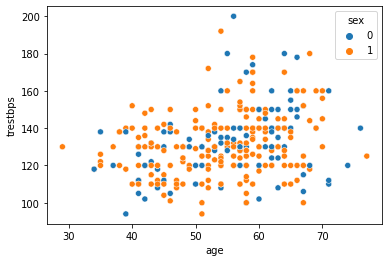

In [ ]:
sns.scatterplot(x="age",y="trestbps",hue="sex",data=heart_data)

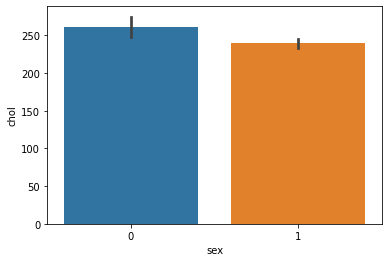

In [ ]:
sns.barplot(x=heart_data['sex'],y=heart_data['chol'])

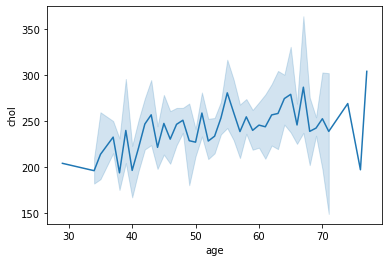

In [ ]:
sns.lineplot(x=heart_data['age'],y=heart_data['chol'])

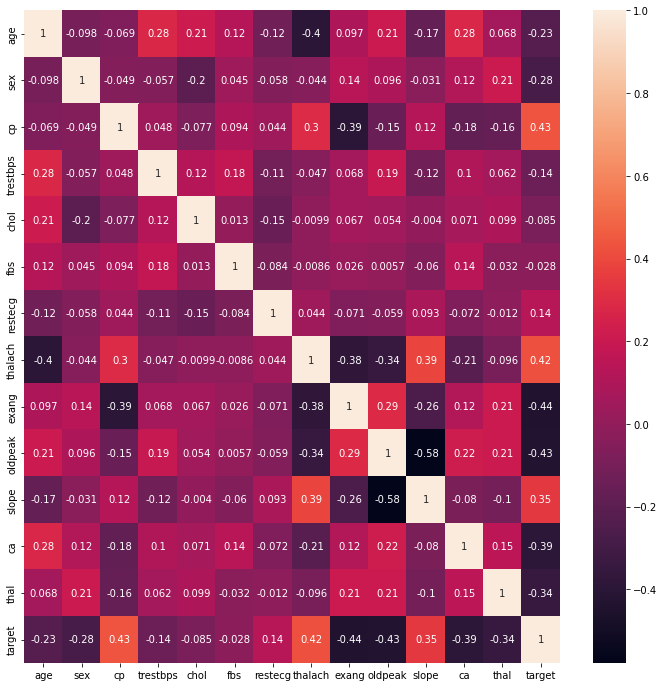

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(heart_data.corr(),annot=True)

# **6 . Building the model :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
heart_data['target']=le.fit_transform(heart_data['target'])
Y = heart_data['target']
X = heart_data.drop(['target'],axis=1)
print(X,Y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns] 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0, test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
randomforest = RandomForestClassifier()
randomforest.fit(X_train,Y_train)

RandomForestClassifier()

# **7 . Evaluate Model :**

In [ ]:
pred_x = randomforest.predict(X_test)
pred_x

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0])

In [ ]:
score = accuracy_score(Y_test,pred_x)
score

0.8351648351648352